In [1]:
import pandas as pd
import numpy as np

In [55]:
medicamentos_2024 = pd.read_excel('2024.xls', skiprows=41)
medicamentos_2023 = pd.read_excel('2023.xls', skiprows=41)
medicamentos_2022 = pd.read_excel('2022.xls', skiprows=48)
medicamentos_2021 = pd.read_excel('2021.xls', skiprows=44)

In [68]:
# drop primeira linha 2023
medicamentos_2023 = medicamentos_2023.drop(index=0)

In [22]:
medicamentos = pd.read_excel('xls_conformidade_site_20251208_170820642.xlsx', skiprows=41)

In [ ]:
def tratamento_medicamentos(df):
    ## Tratar valores não informados na coluna 'TIPO DE PRODUTO (STATUS DO PRODUTO)'
    nao_informado = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] == '    -     '
    df.loc[nao_informado, 'TIPO DE PRODUTO (STATUS DO PRODUTO)'] = 'Não Informado'
    try:
        # Criar coluna preco_final_consumidor
        if(type(df.loc[1, 'PMC 18%']) == str):
            df['preco_final_consumidor'] = df['PMC 18%']\
            .str.replace(',', '.')\
            .str.replace('*', '')\
            .astype(float)
        else:
            df['preco_final_consumidor'] = df['PMC 18%']\
                .astype(float)

        # Tratar preços de medicamentos genéricos
        genericos = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] ==  'Genérico' 
        if(type(df.loc[1, 'PMC 0%']) == str):
            df.loc[genericos,'preco_final_consumidor'] = \
            df.loc[genericos, 'PMC 0%']\
            .str.replace(',', '.')\
            .str.replace('*', '')\
            .astype(float)
        else:
            df.loc[genericos,'preco_final_consumidor'] = \
            df.loc[genericos, 'PMC 0%']\
            .astype(float)
    except:
        genericos = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] ==  'Genérico' 

        df['preco_final_consumidor'] = pd.to_numeric(
            df['PMC 18%'].astype(str).str.replace(',', '.'),
            errors='coerce'
        )

        df.loc[genericos,'preco_final_consumidor'] = \
            pd.to_numeric( 
                df.loc[genericos, 'PMC 0%'].astype(str).str.replace(',', '.'),
                errors='coerce'
            )
        
    # Remover colunas desnecessárias
    colunas_para_remover = [
        'PF Sem Impostos', 'PF 0%', 'PF 12 %',
        'PF 12 %  ALC', 'PF 17 %', 'PF 17 %  ALC', 'PF 17,5 %',
        'PF 17,5 %  ALC', 'PF 18 %', 'PF 18 %  ALC', 'PF 19 %', 'PF 19 %  ALC',
        'PF 19,5 %', 'PF 19,5 %  ALC', 'PF 20 %', 'PF 20 %  ALC', 'PF 20,5 %',
        'PF 20,5 %  ALC', 'PF 21 %', 'PF 21 %  ALC', 'PF 22 %', 'PF 22 %  ALC',
        'PF 22,5 %', 'PF 22,5 %  ALC', 'PF 23 %', 'PF 23 %  ALC',
        'PMC Sem Impostos', 'PMC 0 %', 'PMC 12 %', 'PMC 12 %  ALC', 'PMC 17 %',
        'PMC 17 %  ALC', 'PMC 17,5 %', 'PMC 17,5 %  ALC', 'PMC 18 %',
        'PMC 18 %  ALC', 'PMC 19 %', 'PMC 19 %  ALC', 'PMC 19,5 %',
        'PMC 19,5 %  ALC', 'PMC 20 %', 'PMC 20 %  ALC', 'PMC 20,5 %',
        'PMC 20,5 %  ALC', 'PMC 21 %', 'PMC 21 %  ALC', 'PMC 22 %',
        'PMC 22 %  ALC', 'PMC 22,5 %', 'PMC 22,5 %  ALC', 'PMC 23 %',
        'PMC 23 %  ALC', 'ICMS 0%',
        'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 12% ALC',
        'PF 17%', 'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%',
        'PF 18% ALC', 'PF 19%', 'PF 19% ALC', 'PF 19,5%', 'PF 19,5% ALC',
        'PF 20%', 'PF 20% ALC', 'PF 20,5%', 'PF 21%', 'PF 21% ALC', 'PF 22%',
        'PF 22% ALC', 'PMC Sem Imposto', 'PMC 0%', 'PMC 12%', 'PMC 12% ALC',
        'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%', 'PMC 17,5% ALC', 'PMC 18%',
        'PMC 18% ALC', 'PMC 19%', 'PMC 19% ALC', 'PMC 19,5%', 'PMC 19,5% ALC',
        'PMC 20%', 'PMC 20% ALC', 'PMC 20,5%', 'PMC 21%', 'PMC 21% ALC',
        'PMC 22%', 'PMC 22% ALC',
    ]
    df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

    # Strip colunas de texto
    df.columns = df.columns.str.strip()

    # Remoção outras colunas desnecessárias
    colunas_para_remover = [
        'CÓDIGO GGREM', 'CAP', 'CONFAZ 87', 'ANÁLISE RECURSAL',
        'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
        'DESTINAÇÃO COMERCIAL'
    ]
    df.drop(columns=colunas_para_remover, inplace=True, errors='ignore')


    # renomear colunas
    df.rename(
        columns={
        'SUBSTÂNCIA': 'ativo',
        'LABORATÓRIO': 'laboratorio',
        'REGISTRO': 'registro',
        'PRODUTO': 'produto',
        'APRESENTAÇÃO': 'apresentacao',
        'CLASSE TERAPÊUTICA': 'classe_terapeutica',
        'TIPO DE PRODUTO (STATUS DO PRODUTO)': 'tipo_produto',
        'REGIME DE PREÇO': 'regime_preco',
        'RESTRIÇÃO HOSPITALAR': 'restricao_hospitalar',
        'COMERCIALIZAÇÃO 2024': 'comercializavel',
        'COMERCIALIZAÇÃO 2022': 'comercializavel',
        'COMERCIALIZAÇÃO 2020': 'comercializavel',
        'TARJA': 'tarja'
        }, 
        inplace=True
    )

    # Ajustar tipos de dados
    df['EAN 1'] = df['EAN 1'].astype(str)
    df['EAN 2'] = df['EAN 2'].astype(str)
    df['EAN 3'] = df['EAN 3'].astype(str)

    # Tratar valores faltantes
    df.replace('    -     ', np.nan, inplace=True)
    
    # Ajustar colunas booleanas
    df['restricao_hospitalar'] = df['restricao_hospitalar'] == 'Sim'
    df['comercializavel'] = df['comercializavel'] == 'Sim'
    # Tratar coluna tarja
    sem_tarja = df['tarja'] == 'Tarja Sem Tarja'
    sem_tarja_definida = df['tarja'].str.contains('(*)', regex=False)

    df.loc[sem_tarja, 'tarja'] = 'Sem Tarja'
    df.loc[sem_tarja_definida, 'tarja'] = 'Sem Tarja' 
    
    # Remove (**) da coluna tarja
    df['tarja'] = df['tarja'].str.replace  '', regex=False).str.strip()
    
    return df

In [ ]:
medicamentos = tratamento_medicamentos(medicamentos)

KeyError: 'PMC 18 %'

In [57]:
medicamentos_2024 = tratamento_medicamentos(medicamentos_2024)
medicamentos_2024.head()

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
0,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,1705600230032,7891106000956,NaN,NaN,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,Novo,Regulado,False,True,Sem Tarja,48.22
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900019,7896016806469,NaN,NaN,ORENCIA,250 MG PO LIOF SOL INJ CT 1 FA + SER DESCARTÁVEL,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,True,True,Tarja Vermelha,NaN
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900078,7896016808197,NaN,NaN,ORENCIA,125 MG/ML SOL INJ SC CT 4 SER PREENC VD TRANS ...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,False,True,Sem Tarja,10826.15
3,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990018,7896382708442,NaN,NaN,VERZENIOS,50 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,5077.25
4,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990034,7896382708466,NaN,NaN,VERZENIOS,100 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,10154.47


In [72]:
medicamentos_2023 = tratamento_medicamentos(medicamentos_2023)
medicamentos_2023.head()

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
1,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,1.781709e+12,7896094921313,NaN,NaN,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,False,True,Tarja Vermelha,14.83
2,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,1.356906e+12,7894916202671,NaN,NaN,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,False,True,Tarja Vermelha sob restrição,266.62
3,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,1.123634e+12,7896212479931,NaN,NaN,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,True,True,Tarja Vermelha sob restrição,NaN
4,RITUXIMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1.004706e+12,7897595635211,NaN,NaN,RIXIMYO,10 MG/ML SOL DIL INFUS CT 1 FR VD TRANS X 50 ML,"L1G1 - ANTICORPOS MONOCLONAIS ANTINEOPLÁSICOS,...",Biológico,Regulado,True,True,Tarja Vermelha,NaN
5,ERDAFITINIBE,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,1.123634e+12,7896212479979,NaN,NaN,ERFANDEL,3 MG COM REV CT BL AL PLAS PVC/PCTFE TRANS X 56,L1H9 - OUTROS ANTINEOPLÁSICOS INIBIDORES DA PR...,Novo,Regulado,False,True,Tarja Vermelha,62748.63


In [84]:
medicamentos_2022 = tratamento_medicamentos(medicamentos_2022)
medicamentos_2022.head()

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
0,VALPROATO DE SÓDIO,49.475.833/0001-06,BIOLAB SANUS FARMACÊUTICA LTDA,NaN,7896112401247,NaN,NaN,ÁCIDO VALPRÓICO,250 MG CAP GEL MOLE CT FR VD AMB X 100,N3A - ANTIEPILÉPTICOS,Similar,Regulado,False,True,Tarja Vermelha (**),60.83
1,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,057600510011,7896210500354,NaN,NaN,TALCO ALÍVIO,TALQUEIRA C/ 100 G,D10A - ANTIACNEICOS TÓPICOS,Similar,Regulado,False,False,Tarja Preta (**),9.43
2,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,1002001390025,7896116871497,NaN,NaN,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,G3A4 - PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS,Não Informado,Regulado,False,False,Tarja Vermelha,200.78
3,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050014,7897337706575,NaN,NaN,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,False,True,Tarja Vermelha (**),83.50
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050022,7897337706568,NaN,NaN,SINGULAIR,10 MG COM REV CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,False,True,Tarja Vermelha (**),83.50


In [100]:
medicamentos_2021 = tratamento_medicamentos(medicamentos_2021)
medicamentos_2021.head()

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
0,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,1705600230032,7891106000956,NaN,NaN,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,Novo,Regulado,False,True,Tarja Vermelha,39.40
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900019,7896016806469,NaN,NaN,ORENCIA,250 MG PO LIOF SOL INFUS IV CT 1 FA + SER DESC...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,True,True,Sem Tarja,NaN
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900027,7896016807442,NaN,NaN,ORENCIA,125 MG/ML SOL INJ SC CT SER PREENCHIDA,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,False,False,Tarja Vermelha,2211.74
3,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900078,7896016808197,NaN,NaN,ORENCIA,125 MG/ML SOL INJ SC CT 4 SER PREENC VD TRANS ...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,False,True,Tarja Vermelha,8847.11
4,ABCIXIMABE,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,1123634150015,7896212452453,NaN,NaN,REOPRO,2 MG/ML SOL INJ CT FA VD INC X 5 ML,"B1C3 - INIBIDORES DA AGREGAÇÃO PLAQUETÁRIA, AN...",Biológico Novo,Regulado,True,False,Tarja Vermelha,NaN


In [101]:
# ADICIONANDO COLUNA ANO
medicamentos['ano'] = 2025
medicamentos_2024['ano'] = 2024
medicamentos_2023['ano'] = 2023
medicamentos_2022['ano'] = 2022
medicamentos_2021['ano'] = 2021

# CONCATENANDO (Empilhando)
# ignore_index=True
historico_medicamentos = pd.concat([
    medicamentos, medicamentos_2024, 
    medicamentos_2023, medicamentos_2022, 
    medicamentos_2021
    ], ignore_index=True)

display(historico_medicamentos.head())

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor,ano
0,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,1705600230032,7891106000956,NaN,NaN,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,Novo,Regulado,False,True,Sem Tarja,49.06,2025
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900019,7896016806469,NaN,NaN,ORENCIA,250 MG PO LIOF SOL INJ CT 1 FA + SER DESCARTÁVEL,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,True,True,Tarja Vermelha,NaN,2025
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900078,7896016808197,NaN,NaN,ORENCIA,125 MG/ML SOL INJ SC CT 4 SER PREENC VD TRANS ...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,False,True,Sem Tarja,11107.63,2025
3,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990018,7896382708442,NaN,NaN,VERZENIOS,50 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,5104.43,2025
4,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990034,7896382708466,NaN,NaN,VERZENIOS,100 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,10208.83,2025


In [102]:
historico_medicamentos.to_csv('historico_medicamentos.csv', index=False)

In [ ]:
def buscar_remedios(termo_busca, df):
    """
    Busca por medicamentos no DataFrame fornecido.
    Ignora maiúsculas/minúsculas e acentuacão.
    """
    termo_busca = str(termo_busca).strip() # removeu espaços extras
    busca_ean = df['EAN 1'] == termo_busca
    
    if busca_ean.any():
        print(f"✅ Encontrado por Código de Barras (EAN): {termo_busca}")
        return df[busca_ean]
    
    elif (df['registro'] == termo_busca).any():
        print(f"✅ Encontrado por Registro: {termo_busca}")
        return df[df['registro'] == termo_busca]
    
    # segunda tentativa
    busca_por_ativo = df['ativo'].str.contains(termo_busca, case=False, na=False)
    
    if busca_por_ativo.any():
        print(f"✅ Encontrado por Princípio Ativo: '{termo_busca}'")
        return df[busca_por_ativo]
    
    # não achou nada
    print(f"❌ Nenhum medicamento encontrado para: '{termo_busca}'")
    return None


In [96]:
primeiro_filtro = medicamentos['produto'].str.contains("dorflex", case=False, na=False)
segundo_filtro = pd.Series([False]*len(medicamentos))
(primeiro_filtro | segundo_filtro).any()

np.True_

In [99]:
import unicodedata

def buscar_remedios(termo_busca, df):
    """
    Busca por medicamentos no DataFrame fornecido.
    Ignora maiúsculas/minúsculas e acentuacão.
    """
    termo_busca = str(termo_busca).strip()   
    termo_limpo = unicodedata.normalize('NFKD', termo_busca).encode('ascii', errors='ignore').decode('utf-8')

    busca_ean = df['registro'] == termo_busca
    
    if busca_ean.any():
        print(f"✅ Encontrado por Código de registro: {termo_busca}")
        return df[busca_ean]
    elif (df['EAN 1'] == termo_busca).any():
        print(f"✅ Encontrado por EAN 1: {termo_busca}")
        return df[df['EAN 1'] == termo_busca]

    mask_ativo = df['ativo'].str.contains(termo_limpo, case=False, na=False, regex=False)
    mask_produto = df['produto'].str.contains(termo_limpo, case=False, na=False, regex=False)

    resultados = df[mask_ativo | mask_produto]

    if not resultados.empty:
        print(f"✅ Encontrado(s) {len(resultados)} resultado(s) para: {termo_busca}")
        return resultados.head(10)
    else:
        print(f"❌ Nenhum resultado encontrado para: {termo_busca}")
        return pd.DataFrame()


In [100]:
termo_digitado = input("qual medicamento você quer buscar? ")
resultado = buscar_remedios(termo_digitado, medicamentos)
display(resultado)

❌ Nenhum resultado encontrado para: dipirona$


""


In [15]:
termo_limpo = "dorflex"
ativo_limpo = medicamentos['ativo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
produto_limpo = medicamentos['produto'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

mask_ativo = ativo_limpo.str.contains(termo_limpo, case=False, na=False)
mask_produto = produto_limpo.str.contains(termo_limpo, case=False, na=False)

resultados = medicamentos[mask_ativo | mask_produto]
resultados

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
11649,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600229,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS TRANS X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,143.24
11650,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600296,7.891058e+12,NaN,NaN,DORFLEX UNO,1G COM EFEV CT STR AL AL X 6,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,True,Sem Tarja,25.52
11651,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600636,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 4,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,True,Sem Tarja,13.46
11652,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600687,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 92,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,True,Sem Tarja,155.35
11663,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000070651,7.891058e+12,NaN,NaN,DORFLEX DIP,1 G COM CT BL AL PLAS PVC OPC X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,12.99
11664,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090308,7.891058e+12,NaN,NaN,DORFLEX UNO,1G COM EFEV CT STR AL AL X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,24.60
11665,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090324,7.891058e+12,NaN,NaN,DORFLEX UNO,1G COM EFEV CT STR AL AL X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,249.26
11666,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090642,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,13.76
11667,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090650,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 20,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,22.27
11668,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090693,7.891058e+12,NaN,NaN,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,159.72


In [20]:
[mask_ativo | mask_produto]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 26770    False
 26771    False
 26772    False
 26773    False
 26774    False
 Length: 26775, dtype: bool]

In [109]:
medicamentos['laboratorio'].value_counts()

laboratorio
EMS S/A                                                1727
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                    1397
EUROFARMA LABORATORIOS S.A.                            1211
GERMED FARMACEUTICA LTDA                               1133
PRATI DONADUZZI & CIA LTDA                             1130
                                                       ... 
HEARST LABORATORIOS DO BRASIL LTDA                        1
CATALENT BRASIL LTDA.                                     1
LABORATÓRIO NEO QUÍMICA COMÉRCIO E INDÚSTRIA LTDA         1
CML PRODUTOS MÉDICOS LTDA                                 1
PANAMERICAN MEDICAL SUPPLY SUPRIMENTOS MEDICOS LTDA       1
Name: count, Length: 259, dtype: int64

<Axes: title={'center': 'Quantidade de Produtos por Laboratório'}>

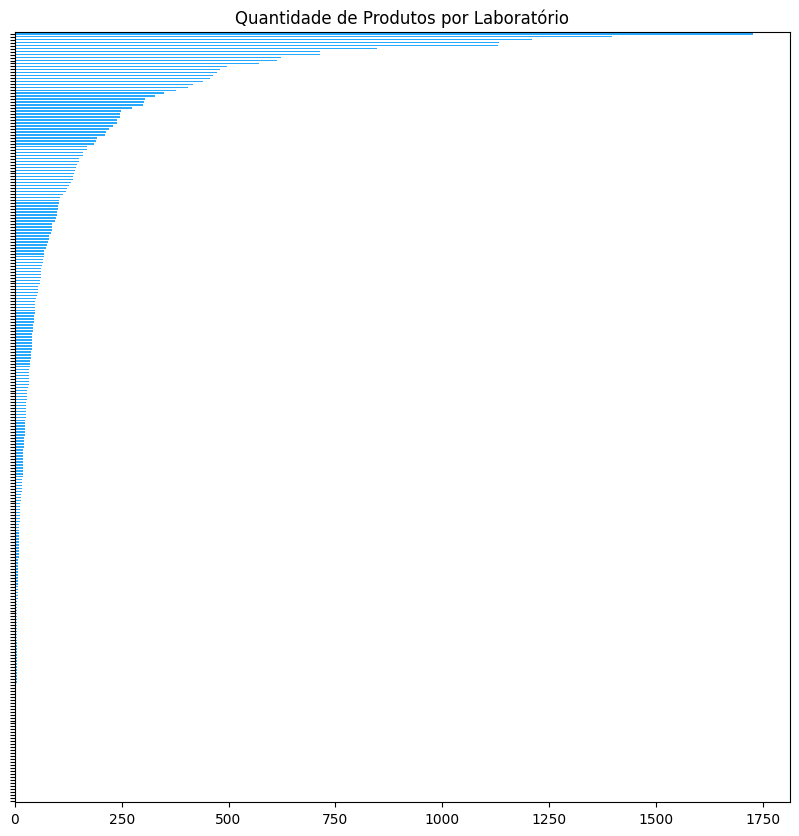

In [108]:
contagem_lab = medicamentos['laboratorio'].value_counts()\
    .sort_values(ascending=True)

ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color="#27A9FF",
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1.set_yticklabels([])
ax1.set_ylabel('')
ax1

# 1. Encontrar 10 maiores laboratórios em número de produtos cadastrados
# 2. Encontrar 10 laboratórios com preço medio mais alto

In [127]:
medicamentos.groupby('laboratorio')['preco_final_consumidor']\
    .mean().sort_values(ascending=True).head(10)

laboratorio
LABORATORIO SIMOES LTDA.                                 6.890000
LABORATÓRIO NEO QUÍMICA COMÉRCIO E INDÚSTRIA LTDA       10.910000
LABORATORIO INDUSTRIAL FARMACÊUTICO LIFAR LTDA          13.240000
CASA GRANADO LABORATÓRIOS, FARMÁCIAS E DROGARIAS S/A    13.534000
MINÂNCORA & CIA LTDA                                    15.630000
SALBEGO LABORATÓRIO FARMACÊUTICO LTDA                   17.404000
HISAMITSU FARMACÊUTICA DO BRASIL LTDA                   18.953333
DKT DO BRASIL PRODUTOS DE USO PESSOAL LTDA              19.095000
JARRELL FARMACÊUTICA LTDA EPP                           20.315000
AVERT LABORATÓRIOS LTDA                                 26.620000
Name: preco_final_consumidor, dtype: float64

In [117]:
medicamentos.groupby(medicamentos['laboratorio'])\
    .preco_final_consumidor.mean()\
    .sort_values(ascending=False).head(10)

laboratorio
NOVARTIS BIOCIENCIAS S.A                                   1.269891e+06
SPECIALTY PHARMA GOIAS LTDA                                4.294320e+05
GILEAD SCIENCES FARMACEUTICA DO BRASIL LTDA                3.757024e+05
PRODUTOS ROCHE QUÍMICOS E FARMACÊUTICOS S.A.               2.998449e+05
HORIZON THERAPEUTICS BRASIL LTDA.                          2.652993e+05
AMRYT BRASIL COMERCIO E IMPORTACAO DE MEDICAMENTOS LTDA    2.176555e+05
PTC FARMACEUTICA DO BRASIL LTDA.                           1.356310e+05
ALEXION SERVICOS E FARMACEUTICA DO BRASIL LTDA             1.170138e+05
BIOGEN BRASIL PRODUTOS FARMACEUTICOS LTDA                  1.060474e+05
VERTEX FARMACEUTICA DO BRASIL LTDA.                        1.006159e+05
Name: preco_final_consumidor, dtype: float64

<Axes: ylabel='laboratorio'>

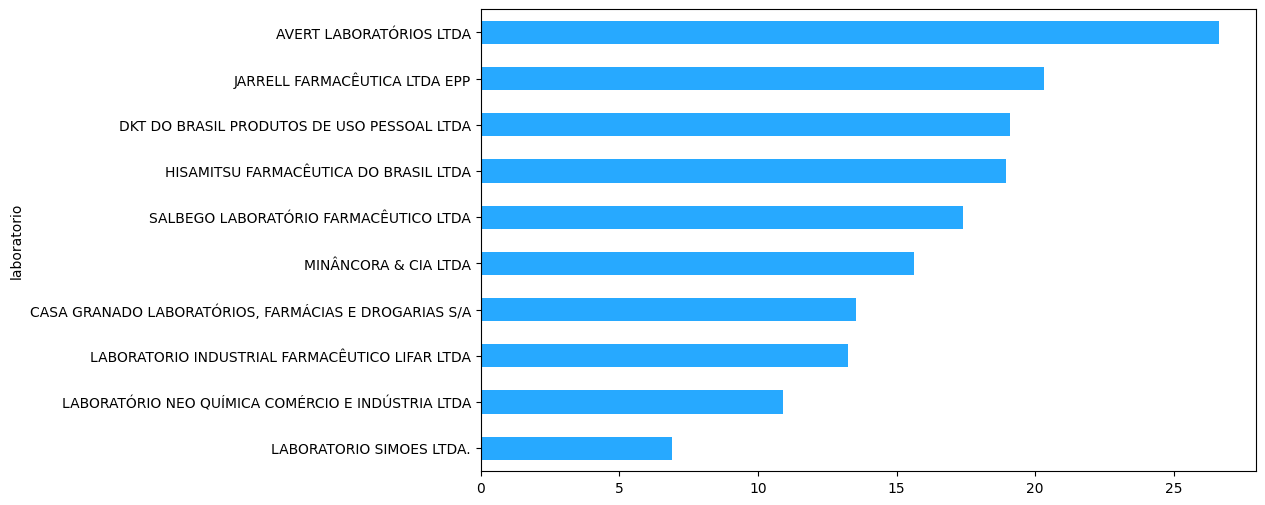

In [129]:
medicamentos.groupby(medicamentos['laboratorio'])\
    .preco_final_consumidor.mean()\
    .sort_values(ascending=True).head(10)\
    .plot(kind='barh', figsize=(10, 6), color="#27A9FF")

<Axes: title={'center': 'Quantidade de Produtos por Laboratório'}>

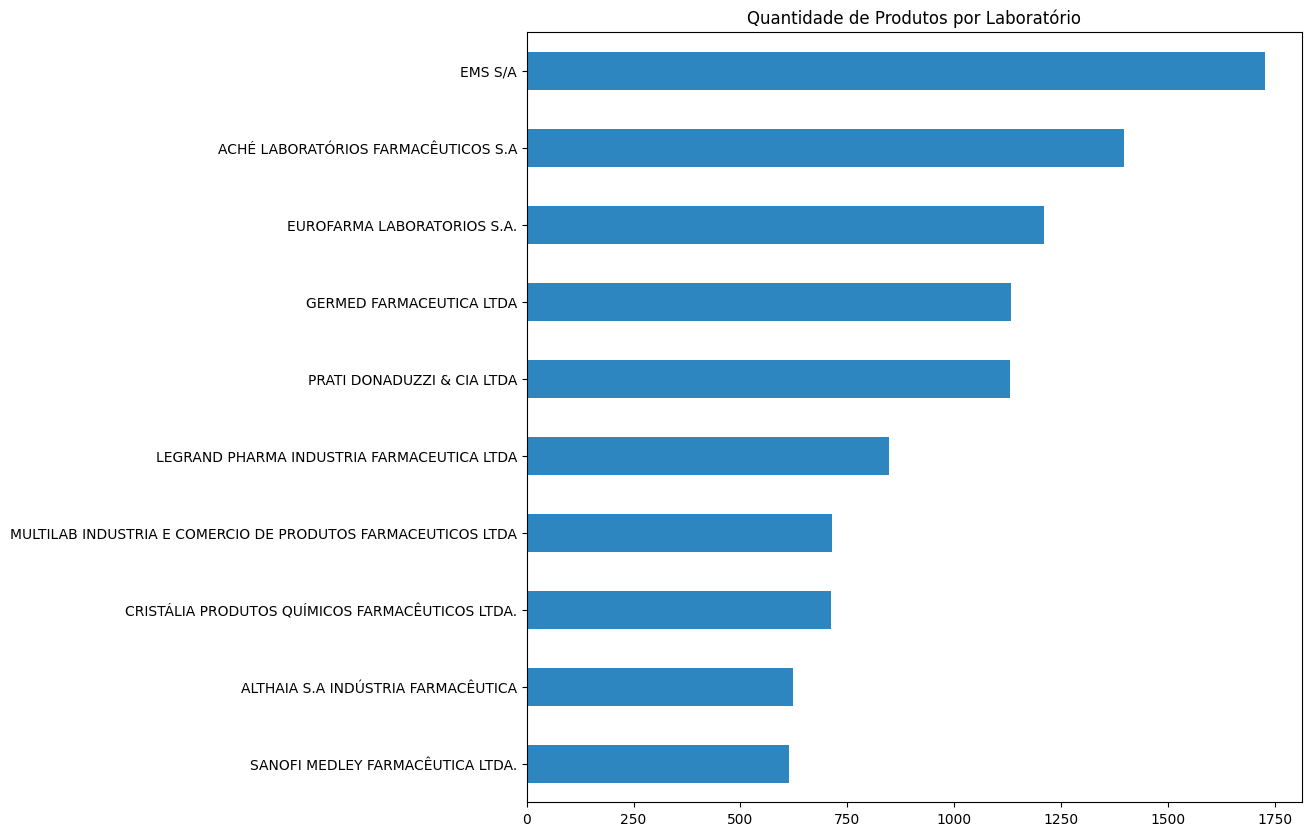

In [ ]:
contagem_lab = medicamentos['laboratorio'].value_counts().sort_values(ascending=False).head(10)


ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color='#2E86C1', 
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1

In [ ]:
contagem_lab = medicamentos['laboratorio'].value_counts().head(10).sort_values(ascending=True)


ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color='#2E86C1', 
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1

In [ ]:
### Aula 10

In [1]:
import pandas as pd
import numpy as np

medicamentos = pd.read_csv('medicamentos_limpo.csv')

In [7]:
medicamentos['tarja'].value_counts()

tarja
Tarja Vermelha                  13600
Sem Tarja                        7281
Tarja Vermelha sob restrição     5142
Tarja Preta                       752
Name: count, dtype: int64

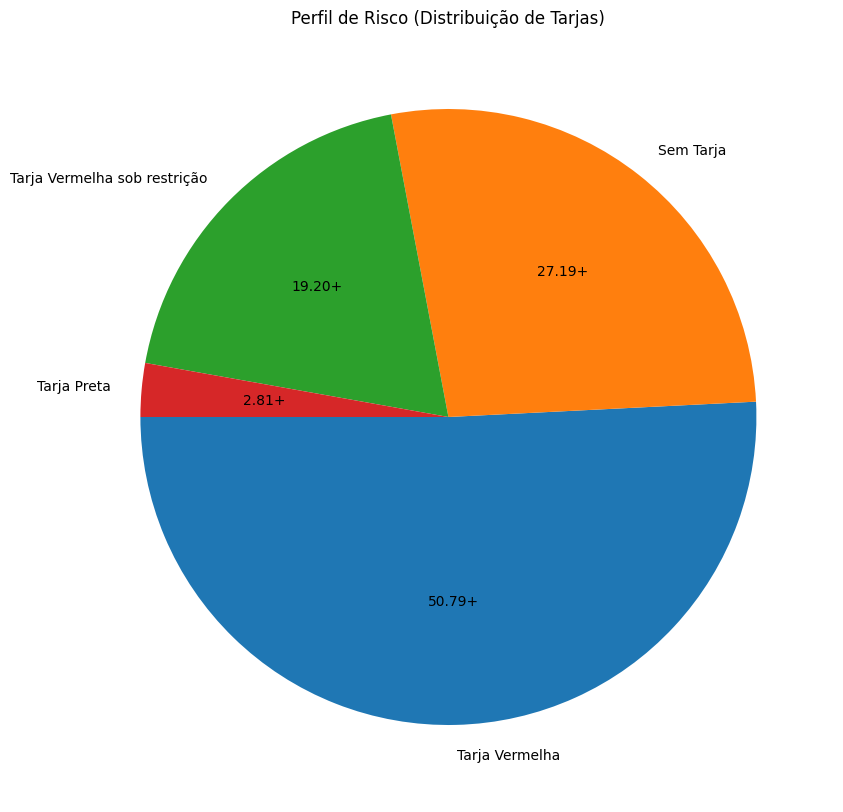

In [ ]:
distribuicao_tarja = medicamentos['tarja'].value_counts()

ax2 = distribuicao_tarja.plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.2f%%',
    startangle=180,
    title='Perfil de Risco (Distribuição de Tarjas)',
    ylabel='' 
)

<Axes: title={'center': 'preco_final_consumidor'}, xlabel='tipo_produto'>

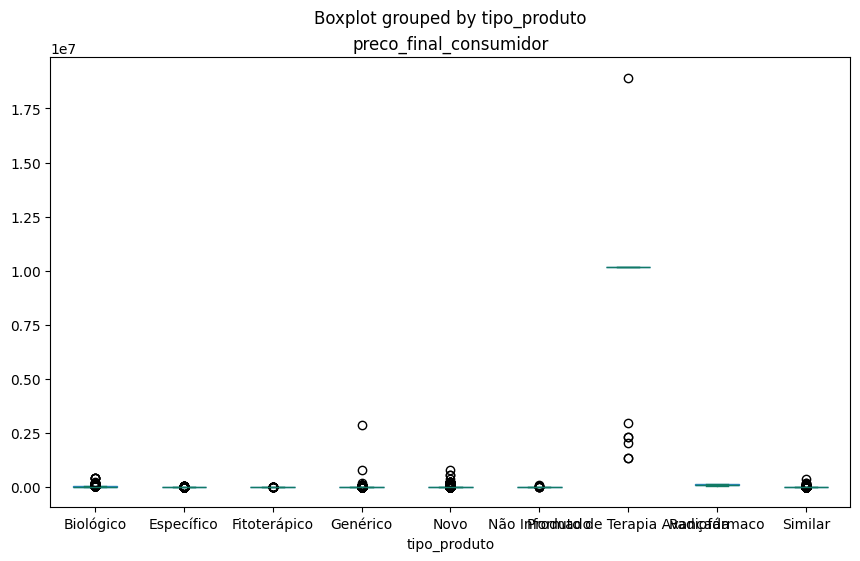

In [ ]:
# Configurando o tamanho da figura
medicamentos.boxplot(
    column='preco_final_consumidor', 
    by='tipo_produto',
    figsize=(10, 6),
    patch_artist=True,
    color=dict(boxes='#2E86C1', whiskers='#117A65', medians='#117A65', caps='#117A65'),
)

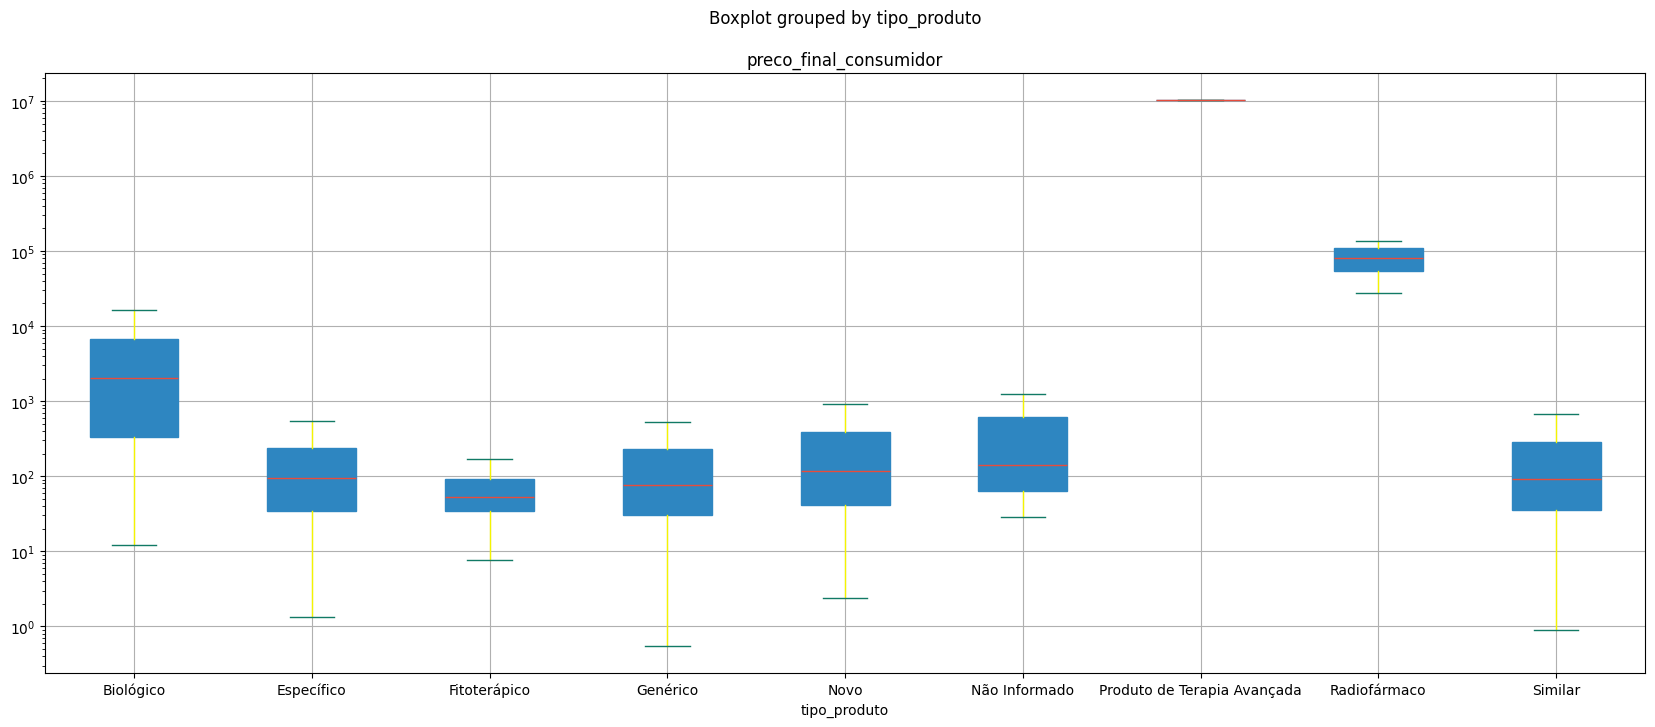

In [16]:
import matplotlib.pyplot as plt
ax = medicamentos.boxplot(
    column='preco_final_consumidor', 
    by='tipo_produto', 
    figsize=(20, 8), # Aumentei um pouco para garantir leitura
    grid=True, # Grid ajuda a ler log
    color=dict(boxes='#2E86C1', whiskers="#F4F401", medians='#e74c3c', caps='#117A65'),
    showfliers=False,
    patch_artist=True 
)
plt.yscale('log') # Transforma o eixo Y em escala logarítmica

In [19]:
np.log(medicamentos.groupby('tipo_produto')['preco_final_consumidor'].mean())

tipo_produto
Biológico                       9.180870
Específico                      5.832707
Fitoterápico                    4.602370
Genérico                        6.996072
Novo                            8.393837
Não Informado                   7.979383
Produto de Terapia Avançada    16.041743
Radiofármaco                   11.312926
Similar                         6.878993
Name: preco_final_consumidor, dtype: float64

In [23]:
np.log(medicamentos.groupby('tipo_produto')['preco_final_consumidor'].describe().iloc[:, 1:])

,mean,std,min,25%,50%,75%,max
tipo_produto,,,,,,,
Biológico,9.180870,10.327764,2.488234,5.798820,7.618399,8.828969,12.946624
Específico,5.832707,6.739558,0.277632,3.531202,4.551400,5.468313,9.024145
Fitoterápico,4.602370,5.339876,2.030776,3.541177,3.960432,4.521843,7.628926
Genérico,6.996072,10.315198,-0.597837,3.418054,4.340553,5.436262,14.866749
Novo,8.393837,10.130478,0.867100,3.735286,4.753676,5.969449,13.579626
Não Informado,7.979383,9.441591,3.343568,4.146304,4.943284,6.406995,11.426258
Produto de Terapia Avançada,16.041743,14.977852,14.094053,16.135515,16.135515,16.135515,16.756377
Radiofármaco,11.312926,11.253877,10.214628,10.907540,11.312926,11.600569,11.823689
Similar,6.878993,8.730199,-0.105361,3.562395,4.533889,5.661518,12.789927


In [31]:
medicamentos.groupby('tarja')['preco_final_consumidor'].mean()

tarja
Sem Tarja                         981.848088
Tarja Preta                       256.581742
Tarja Vermelha                  32963.253583
Tarja Vermelha sob restrição      754.528973
Name: preco_final_consumidor, dtype: float64

In [30]:
medicamentos.groupby('tarja')['preco_final_consumidor'].agg(
    Contagem=('std')
)

,Contagem
tarja,
Sem Tarja,7169.855888
Tarja Preta,540.056031
Tarja Vermelha,556705.886136
Tarja Vermelha sob restrição,3125.537076


In [27]:
# 1. ANÁLISE DE NEGÓCIO (Groupby = Tabela Dinâmica)
# Vamos agrupar por Tipo e calcular métricas chaves
analise_precos = medicamentos.groupby('tipo_produto')['preco_final_consumidor'].agg(
    Contagem=('count'),             # Quantos produtos tem?
    Preco_Minimo=('min'),           # Mais barato
    Preco_Medio=('mean'),           # Média (Cuidado!)
    Preco_Mediano=('median'),       # Mediana (A realidade do mercado)
    Preco_Maximo=('max'),           # Mais caro (Outlier)
    Desvio_Padrao=('std')           # Variação
).sort_values('Preco_Mediano', ascending=False)

# 2. FORMATANDO COMO PLANILHA (Styler)
# Isso gera uma visualização HTML idêntica ao Excel com formatação condicional
formatacao = {
    'Preco_Minimo': 'R$ {:,.2f}',
    'Preco_Medio': 'R$ {:,.2f}',
    'Preco_Mediano': 'R$ {:,.2f}',
    'Preco_Maximo': 'R$ {:,.2f}',
    'Desvio_Padrao': 'R$ {:,.2f}'
}

print("=== RELATÓRIO DE PRECIFICAÇÃO POR CATEGORIA ===")
display(
    analise_precos.style
    .format(formatacao)
    # Gradiente de cor para destacar os valores altos (Heatmap)
    .background_gradient(subset=['Preco_Mediano', 'Preco_Maximo'], cmap='Reds')
    .background_gradient(subset=['Contagem'], cmap='Blues')
)

=== RELATÓRIO DE PRECIFICAÇÃO POR CATEGORIA ===


,Contagem,Preco_Minimo,Preco_Medio,Preco_Mediano,Preco_Maximo,Desvio_Padrao
tipo_produto,,,,,,
Produto de Terapia Avançada,44,"R$ 1,321,202.58","R$ 9,264,894.18","R$ 10,175,722.18","R$ 18,932,240.08","R$ 3,197,410.02"
Radiofármaco,2,"R$ 27,299.63","R$ 81,873.12","R$ 81,873.12","R$ 136,446.61","R$ 77,178.57"
Biológico,1485,R$ 12.04,"R$ 9,709.60","R$ 2,035.30","R$ 419,418.27","R$ 30,569.67"
Não Informado,57,R$ 28.32,"R$ 2,920.13",R$ 140.23,"R$ 91,698.23","R$ 12,601.74"
Novo,3813,R$ 2.38,"R$ 4,419.75",R$ 116.01,"R$ 789,872.13","R$ 25,096.35"
Específico,2182,R$ 1.32,R$ 341.28,R$ 94.77,"R$ 8,301.11",R$ 845.19
Similar,9018,R$ 0.90,R$ 971.65,R$ 93.12,"R$ 358,586.98","R$ 6,186.96"
Genérico,9816,R$ 0.55,"R$ 1,092.33",R$ 76.75,"R$ 2,861,191.01","R$ 30,187.95"
Fitoterápico,358,R$ 7.62,R$ 99.72,R$ 52.48,"R$ 2,056.84",R$ 208.49


In [67]:
medicamentos.groupby('tipo_produto')['regime_preco'].value_counts()

tipo_produto                 regime_preco
Biológico                    Regulado        1437
                             Liberado          48
Específico                   Regulado        1747
                             Liberado         435
Fitoterápico                 Liberado         358
Genérico                     Regulado        9245
                             Liberado         571
Novo                         Regulado        3412
                             Liberado         401
Não Informado                Regulado          53
                             Liberado           4
Produto de Terapia Avançada  Regulado          44
Radiofármaco                 Regulado           2
Similar                      Regulado        8005
                             Liberado        1013
Name: count, dtype: int64

In [70]:
resultado = medicamentos.groupby(['regime_preco', 'tipo_produto'])['regime_preco'].count()


<Axes: ylabel='regime_preco,tipo_produto'>

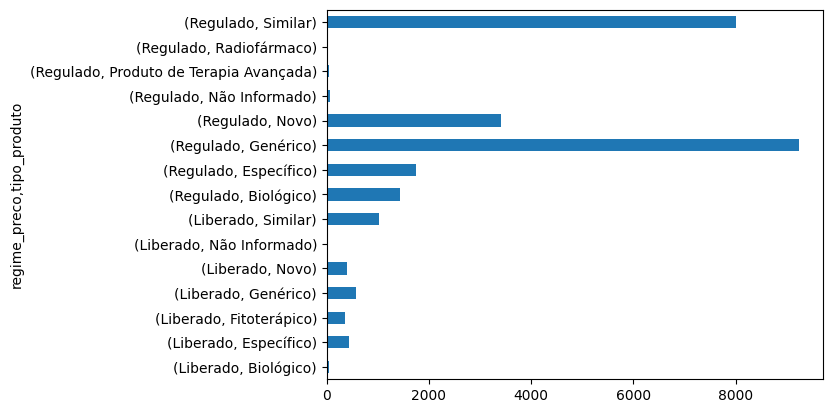

In [74]:
resultado.plot(
    kind='barh'
)

In [76]:
(medicamentos['laboratorio'] == 'PFIZER BRASIL LTDA') | (medicamentos['laboratorio'] == 'TAKEDA PHARMA LTDA.')

0        False
1        False
2        False
3        False
4        False
         ...  
26770    False
26771    False
26772    False
26773    False
26774    False
Name: laboratorio, Length: 26775, dtype: bool

In [138]:
lab1 = "PFIZER BRASIL LTDA"
lab2 = "TAKEDA PHARMA LTDA."

In [139]:
laboratorios_filtro = (medicamentos['laboratorio'] == lab2) | (medicamentos['laboratorio'] == lab1)

In [140]:
comparacao = medicamentos[laboratorios_filtro]

In [142]:
comparacao.groupby(['laboratorio', 'tipo_produto'])['preco_final_consumidor'].describe()

count          mean           std     min  \
laboratorio         tipo_produto                                               
PFIZER BRASIL LTDA  Biológico       52.0  19676.271538  45550.646843   39.12   
                    Específico       0.0           NaN           NaN     NaN   
                    Genérico         2.0    873.575000    622.246896  433.58   
                    Novo           105.0  12071.190190  27059.197610   11.61   
                    Não Informado    2.0   1764.955000   2042.230450  320.88   
                    Similar         28.0   2077.384643   5991.182222   18.23   
TAKEDA PHARMA LTDA. Biológico       27.0  23399.082222  36708.692315  393.92   
                    Específico       7.0    153.322857    256.525232   10.66   
                    Novo            80.0   6850.951875  21093.822883    8.71   
                    Similar         11.0    210.624545    230.046440   23.50   

                                         25%       50%         75%        max  
laboratorio         tipo_produto                                               
PFIZER BRASIL LTDA  Biológico      2600.2825  7866.625  15762.6100  306226.46  
                    Específico           NaN       NaN         NaN        NaN  
                    Genérico        653.5775   873.575   1093.5725    1313.57  
                    Novo             78.2700   583.180  11593.9400  169196.03  
                    Não Informado  1042.9175  1764.955   2486.9925    3209.03  
                    Similar          56.7875   119.060    211.2000   24835.51  
TAKEDA PHARMA LTDA. Biológico      2089.7850  9448.400  28773.9550  171720.51  
                    Específico       28.6900    41.380    122.4100     719.02  
                    Novo             94.6675   259.520    597.1975  151842.13  
                    Similar          49.7800    95.070    343.4550     593.46

In [82]:
comparacao['tipo_produto'].value_counts()

tipo_produto
Novo             203
Biológico        154
Similar           40
Específico         9
Genérico           3
Não Informado      2
Name: count, dtype: int64

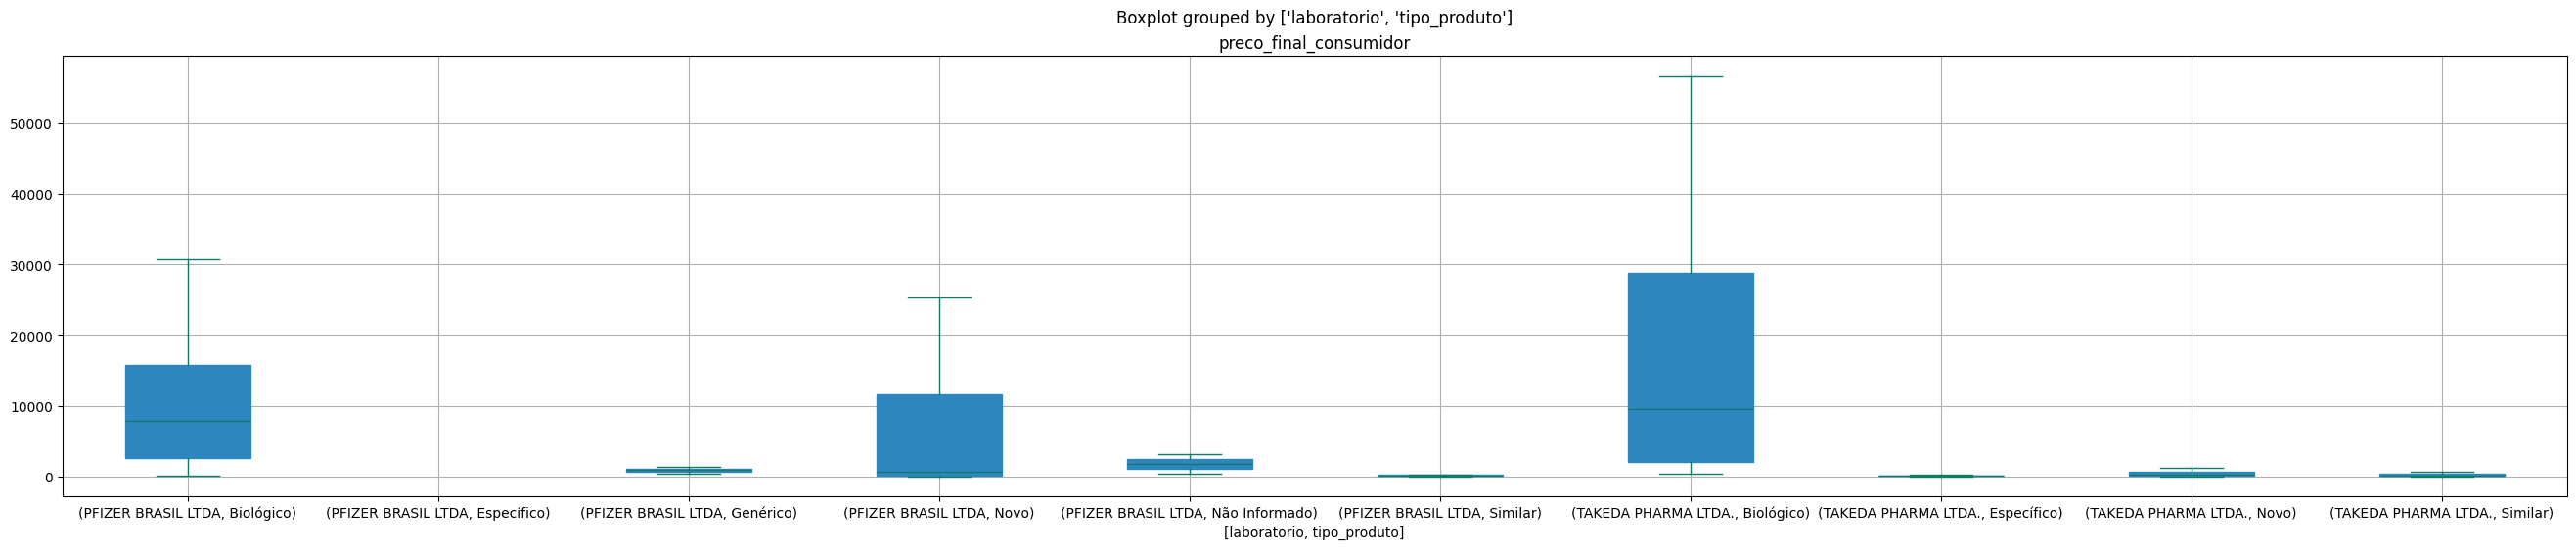

In [ ]:
ax3 = comparacao.boxplot(
    column='preco_final_consumidor',
    by=['laboratorio', 'tipo_produto'],
    figsize=(32, 6),
    showfliers=False,
    patch_artist=True,
    color=dict(boxes='#2E86C1', whiskers='#117A65', medians='#117A65', caps='#117A65'),
)
ax3.set_yscale('log')

In [104]:
import matplotlib.pyplot as plt

In [145]:
historico_medicamentos['ano'].unique()

array([2025, 2024, 2023, 2022, 2021])

In [154]:
historico_medicamentos.dropna(subset=['preco_final_consumidor'], inplace=True)

In [155]:
x = historico_medicamentos['ano']
y = historico_medicamentos['preco_final_consumidor']
y.head()

0       49.06
2    11107.63
3     5104.43
4    10208.83
5    14659.01
Name: preco_final_consumidor, dtype: float64

In [157]:
inclincacao, intercepto = np.polyfit(x, y, 1)
inclincacao

np.float64(293.42274990449516)

Velocidade de Crescimento Anual: R$ 293.42 / ano
🔮 PREVISÃO PARA 2026: R$ 2,313.31


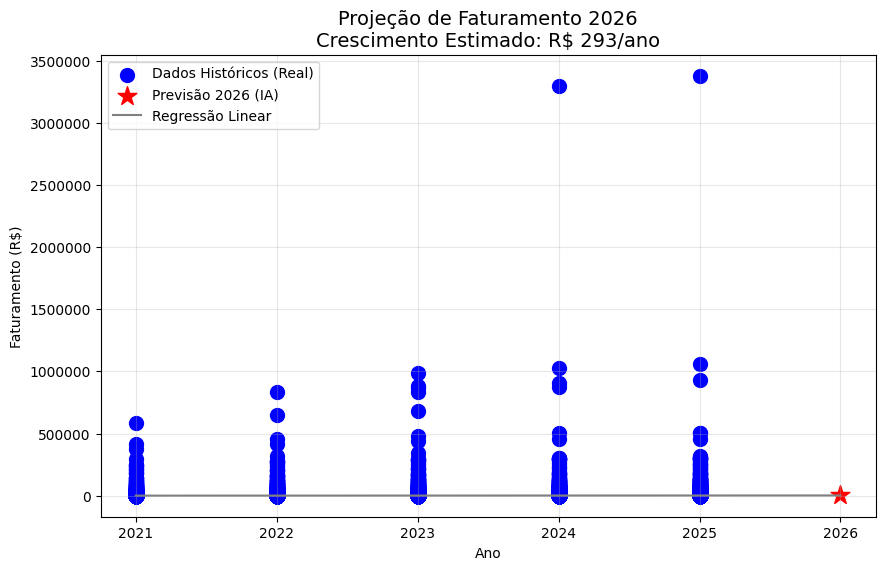

In [158]:
x = historico_medicamentos['ano']
y = historico_medicamentos['preco_final_consumidor']

# np.polyfit(x, y, 1) -> O '1' significa "Equação de 1º Grau" (Uma Reta)
# Ele retorna dois números: 
# 'a' (inclinação da reta/velocidade de crescimento)
# 'b' (onde a reta corta o eixo Y/ponto de partida teórico)
inclincacao, intercepto = np.polyfit(x, y, 1)

print(f"Velocidade de Crescimento Anual: R$ {inclincacao:,.2f} / ano")


ano_futuro = 2026
previsao_2026 = (inclincacao * ano_futuro) + intercepto

print(f"🔮 PREVISÃO PARA 2026: R$ {previsao_2026:,.2f}")



anos_para_plotar = np.array([2021, 2022, 2023, 2024, 2025, 2026])
linha_tendencia = (inclincacao * anos_para_plotar) + intercepto

plt.figure(figsize=(10, 6))


plt.scatter(x, y, color='blue', s=100, label='Dados Históricos (Real)')

# Ponto Futuro (Estrela Vermelha)
plt.scatter(2026, previsao_2026, color='red', s=200, marker='*', label='Previsão 2026 (IA)')

# Linha de Tendência
plt.plot(anos_para_plotar, linha_tendencia, color='gray', label='Regressão Linear')

plt.title(f'Projeção de Faturamento 2026\nCrescimento Estimado: R$ {inclincacao:,.0f}/ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Faturamento (R$)')
plt.grid(True, alpha=0.3)
plt.legend()

# Formatando eixo Y para não ficar notação científica
plt.ticklabel_format(style='plain', axis='y') 

plt.show()

In [ ]:
x = historico_medicamentos['ano']
y = historico_medicamentos['preco_final_consumidor']

In [108]:
historico_medicamentos.columns

Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor', 'ano'],
      dtype='object')

In [ ]:
df_limpo = historico_medicamentos.dropna(subset=['preco_final_consumidor'])

print(f"Linhas originais: {len(historico_medicamentos)}")
print(f"Linhas sem nan: {len(df_limpo)}")

# agrupamento anual e soma
dados_anuais = df_limpo.groupby('ano')['preco_final_consumidor']\
    .sum()\
    .reset_index()

# Ajustando para milhões/bilhões para ficar legível no gráfico
dados_anuais['valor_milhoes'] = dados_anuais['preco_final_consumidor'] / 1e5

print("\nEVOLUÇÃO DO MERCADO (Em 10 milhoes R$) ===")
display(dados_anuais)

Linhas originais: 135247
Linhas sem nan: 112835

EVOLUÇÃO DO MERCADO (Em 10 milhoes R$) ===


,ano,preco_final_consumidor,valor_milhoes
0,2021,19097585.45,19.097585
1,2022,26093444.90,26.093445
2,2023,32852910.32,32.852910
3,2024,37882628.07,37.882628
4,2025,45777481.33,45.777481


In [121]:
# Regressão Linear

# Eixo X (Tempo) e Eixo Y (Dinheiro)
x = dados_anuais['ano'].values
y = dados_anuais['valor_milhoes'].values

# Criando o modelo (y = ax + b)
# deg=1 significa grau 1 (uma reta)
inclination, intercept = np.polyfit(x, y, 1)

# Prevendo 2026
ano_futuro = 2026
previsao_2026 = (inclination * ano_futuro) + intercept

print(f"Crescimento Anual Médio: R$ {inclination*1000:.2f} Milhões")
print(f"Previsão do Valor Total para 2026: R$ {previsao_2026:.2f} Milhoes")

Crescimento Anual Médio: R$ 6514.90 Milhões
Previsão do Valor Total para 2026: R$ 51.89 Milhoes


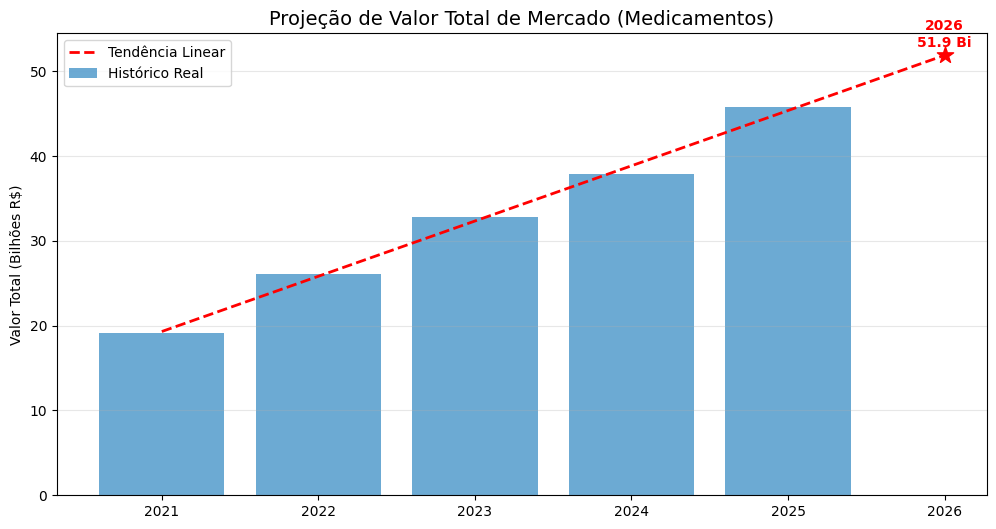

In [ ]:
# Criando pontos para a linha de tendência (do primeiro ano até 2026)
anos_linha = np.arange(x.min(), 2027) 
valores_linha = (inclination * anos_linha) + intercept

plt.figure(figsize=(12, 6))

# 1. Plotando os dados Reais (Barras ou Bolinhas)
plt.bar(x, y, color='#2E86C1', alpha=0.7, label='Histórico Real')

# 2. Plotando a Linha de Tendência (Tracejada)
plt.plot(anos_linha, valores_linha, color='red', linestyle='--', linewidth=2, label='Tendência Linear')

# 3. Destacando o Ponto Futuro (2026)
plt.scatter(2026, previsao_2026, color='red', s=150, zorder=5, marker='*')
plt.text(2026, previsao_2026 + (previsao_2026*0.02), # Texto um pouco acima do ponto
         f"2026\n{previsao_2026:.1f} Bi", 
         ha='center', color='red', fontweight='bold')

plt.title('Projeção de Valor Total de Mercado (Medicamentos)', fontsize=14)
plt.ylabel('Valor Total (10 milhões R$)')
plt.xticks(anos_linha) # Garante que mostre todos os anos no eixo X
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

In [159]:
historico_remedio

,ano,preco_final_consumidor
0,2021,58.920000
1,2022,63.102000
2,2023,14.445000
3,2024,66.883333
4,2025,63.735714


In [ ]:

nome_remedio = 'DIPIRONA' # Aquele biológico caro do seu exemplo
df_remedio = df_limpo[df_limpo['produto'] == nome_remedio]

historico_remedio = df_remedio.groupby('ano')['preco_final_consumidor'].mean().reset_index()

# regressão linear específica do remédio
X_remedio = historico_remedio['ano'].values
y_remedio = historico_remedio['preco_final_consumidor'].values

# Calcula a inclinação e intercepto ESPECÍFICOS deste remédio
incl_r, inter_r = np.polyfit(X_remedio, y_remedio, 1)

# Mágica! Previsão para 2026
preco_2026 = (incl_r * 2026) + inter_r

print(f"ANÁLISE INDIVIDUAL: {nome_remedio}")
print(f"Tendência Anual: {incl_r:.2f} (Se positivo sobe, negativo cai)")
print(f"Preço Estimado 2026: R$ {preco_2026:.2f}")


ANÁLISE INDIVIDUAL: DIPIRONA
Tendência Anual: 1.34 (Se positivo sobe, negativo cai)
Preço Estimado 2026: R$ 57.44


In [ ]:
inclination, intercept = np.polyfit(X_remedio, y_remedio, 1)


array([ 1.34127619e+00, -2.65998452e+03])

In [124]:
def regredir_linear(df, coluna, valor):
    df_remedio = df[df[coluna] == valor]

    historico_remedio = df_remedio.groupby('ano')['preco_final_consumidor'].mean().reset_index()

    # regressão linear específica do remédio
    x_remedio = historico_remedio['ano'].values
    y_remedio = historico_remedio['preco_final_consumidor'].values

    # Calcula a inclinação e intercepto ESPECÍFICOS deste remédio
    incl_r, inter_r = np.polyfit(x_remedio, y_remedio, 1)

    # Mágica! Previsão para 2026
    preco_2026 = (incl_r * 2026) + inter_r

    print(f"ANÁLISE INDIVIDUAL: {valor}")
    print(f"Tendência Anual: {incl_r:.2f} (Se positivo sobe, negativo cai)")
    print(f"Preço Estimado 2026: R$ {preco_2026:.2f}")


In [131]:
df_limpo['laboratorio'] == 'Pfizer'

0         False
2         False
3         False
4         False
5         False
          ...  
135242    False
135243    False
135244    False
135245    False
135246    False
Name: laboratorio, Length: 112835, dtype: bool

In [174]:
df_limpo[df_limpo['ativo'] == "ADALIMUMABE"][df_limpo['ano'] == 2025]

/var/folders/hr/hf99z3sn635_fs6qx5t20m340000gn/T/ipykernel_4363/2718384144.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_limpo[df_limpo['ativo'] == "ADALIMUMABE"][df_limpo['ano'] == 2025]


,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor,ano
584,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670018,7899498608156,NaN,NaN,IDACIO,"50 MG/ML SOL INJ SC CT FA VD TRANS X 0,8 ML + ...",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,2755.99,2025
585,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670026,7899498608163,7899498609184,NaN,IDACIO,50 MG/ML SOL INJ SC CT 2 SER PREENC VD TRANS X...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,5512.04,2025
586,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670034,7899498608170,NaN,NaN,IDACIO,"50 MG/ML SOL INJ SC CT 2 CAN APLIC X 0,8 ML + ...",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,5512.04,2025
587,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280014,7897595636829,NaN,NaN,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Tarja Vermelha,15762.61,2025
588,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280030,7897595636843,NaN,NaN,HYRIMOZ,"40 MG SOL INJ CT 2 CANETA PREENCH X 0,8ML",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Tarja Vermelha,15762.61,2025
589,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280091,7897595635327,NaN,NaN,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Tarja Vermelha,15762.61,2025
590,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280111,7897595635334,NaN,NaN,HYRIMOZ,"40 MG SOL INJ CT 2 CANETA PREENCH X 0,4 ML",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Tarja Vermelha,15762.61,2025
591,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280146,7897595635303,NaN,NaN,HYRIMOZ,"80 MG SOL INJ CT 1 CANETA PREENCH X 0,8 ML",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Tarja Vermelha,15762.61,2025
592,ADALIMUMABE,33.026.055/0001-20,MEGALABS FARMACEUTICA S.A.,1014300740013,7896026173124,NaN,NaN,ATENFE,100 MG/ML SOL INJ CT BL X SER PREENC VD TRANS ...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Tarja Vermelha,1784.67,2025
593,ADALIMUMABE,33.026.055/0001-20,MEGALABS FARMACEUTICA S.A.,1014300740021,7896026173131,NaN,NaN,ATENFE,100 MG/ML SOL INJ CT 2 BL X SER PREENC VD TRAN...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Tarja Vermelha,3569.34,2025


In [168]:
filtro_injecao = df_limpo["ativo"] == "ADALIMUMABE" 
df_ativo = df_limpo[filtro_injecao]
df_ativo

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor,ano
584,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670018,7899498608156,NaN,NaN,IDACIO,"50 MG/ML SOL INJ SC CT FA VD TRANS X 0,8 ML + ...",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,2755.99,2025
585,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670026,7899498608163,7899498609184,NaN,IDACIO,50 MG/ML SOL INJ SC CT 2 SER PREENC VD TRANS X...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,5512.04,2025
586,ADALIMUMABE,49.324.221/0001-04,FRESENIUS KABI BRASIL LTDA,1004101670034,7899498608170,NaN,NaN,IDACIO,"50 MG/ML SOL INJ SC CT 2 CAN APLIC X 0,8 ML + ...",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,5512.04,2025
587,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280014,7897595636829,NaN,NaN,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Tarja Vermelha,15762.61,2025
588,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280030,7897595636843,NaN,NaN,HYRIMOZ,"40 MG SOL INJ CT 2 CANETA PREENCH X 0,8ML",L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Tarja Vermelha,15762.61,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109985,ADALIMUMABE,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000030090,8054083015675,NaN,NaN,HUMIRA,100 MG/ML SOL INJ CT 2 BL X SER PREENC VD TRAN...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,12406.03,2021
109986,ADALIMUMABE,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000030104,8054083015699,NaN,NaN,HUMIRA,100 MG/ML SOL INJ CT BL X SER PREENC VD TRANS ...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,12406.03,2021
109987,ADALIMUMABE,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000030112,8054083015712,NaN,NaN,HUMIRA,100 MG/ML SOL INJ CT BLX SER PREENC VD TRANS X...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Sem Tarja,12406.03,2021
109988,ADALIMUMABE,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000030120,8054083015736,NaN,NaN,HUMIRA,100 MG/ML SOL INJ CT BL X SER PREENC VD TRANS ...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,False,Sem Tarja,12406.03,2021


In [ ]:
filtro_especifico = df_ativo["registro"] == "1004706280014"
aquele_produto = df_ativo[filtro_especifico]

In [170]:
aquele_produto

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor,ano
83004,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280014,7897595636829,NaN,NaN,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Tarja Vermelha,13757.05,2022
109969,ADALIMUMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,1004706280014,7897595636829,NaN,NaN,HYRIMOZ,40 MG SOL INJ CT BL PLAS X 2 SER VD PREENCH C/...,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Biológico,Regulado,False,True,Sem Tarja,4038.08,2021


In [171]:
regredir_linear(aquele_produto, 'ativo', 'ADALIMUMABE')

ANÁLISE INDIVIDUAL: ADALIMUMABE
Tendência Anual: 9718.97 (Se positivo sobe, negativo cai)
Preço Estimado 2026: R$ 52632.93


## Uso do modelo Ramdom Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
historico = pd.read_csv('historico_medicamentos.csv')

In [ ]:
## pre processing
df_ml = historico.copy()
df_ml = df_ml.dropna(subset=['preco_final_consumidor'])
colunas_usadas = ['laboratorio', 'tipo_produto', 'classe_terapeutica', 'restricao_hospitalar', 'ano', 'preco_final_consumidor']
df_ml = df_ml[colunas_usadas]


In [4]:

le = LabelEncoder()
cols_texto = ['laboratorio', 'tipo_produto', 'classe_terapeutica', 'restricao_hospitalar']

for col in cols_texto:
    # Converte para string para garantir e aplica o codificador
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))


In [ ]:
X_train = df_ml[df_ml['ano'] < 2025].drop('preco_final_consumidor', axis=1)
y_train = df_ml[df_ml['ano'] < 2025]['preco_final_consumidor']

X_test = df_ml[df_ml['ano'] == 2025].drop('preco_final_consumidor', axis=1)
y_test = df_ml[df_ml['ano'] == 2025]['preco_final_consumidor']

print(f"Treinando com {len(X_train)} registros do passado...")
print(f"Tentando prever {len(X_test)} preços de 2025...")


Treinando com 90116 registros do passado...
Tentando prever 22719 preços de 2025...


In [6]:

# n_estimators=100: Cria 100 árvores de decisão para votar no preço
modelo = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# A Mágica Acontece Aqui (O computador aprende os padrões)
modelo.fit(X_train, y_train)

# Fazendo a Previsão
previsoes_2025 = modelo.predict(X_test)

previsoes_2025

array([   48.65865439, 10306.64368119, 19347.01163959, ...,
         138.78773111,    38.0331281 ,    50.85673167], shape=(22719,))

In [7]:
# MAE: Erro Médio Absoluto (Em reais, quanto ele erra pra mais ou pra menos?)
mae = mean_absolute_error(y_test, previsoes_2025)

# RMSE: Erro Quadrático (Penaliza erros grandes - bom para evitar desastres)
rmse = np.sqrt(mean_squared_error(y_test, previsoes_2025))

# R2 Score: Nota de 0 a 1 (Quão bem o modelo explica a variação dos preços)
r2 = r2_score(y_test, previsoes_2025)

print("\n=== RELATÓRIO DE PERFORMANCE (2025) ===")
print(f"💰 Erro Médio (MAE): R$ {mae:.2f} (Na média, o modelo erra esse valor)")
print(f"⚠️ Erro Grave (RMSE): R$ {rmse:.2f} (Sensível a outliers caros)")
print(f"📊 Acurácia do Modelo (R²): {r2:.2%} (Quanto da variação o modelo explicou)")



=== RELATÓRIO DE PERFORMANCE (2025) ===
💰 Erro Médio (MAE): R$ 1314.76 (Na média, o modelo erra esse valor)
⚠️ Erro Grave (RMSE): R$ 19481.31 (Sensível a outliers caros)
📊 Acurácia do Modelo (R²): 49.67% (Quanto da variação o modelo explicou)


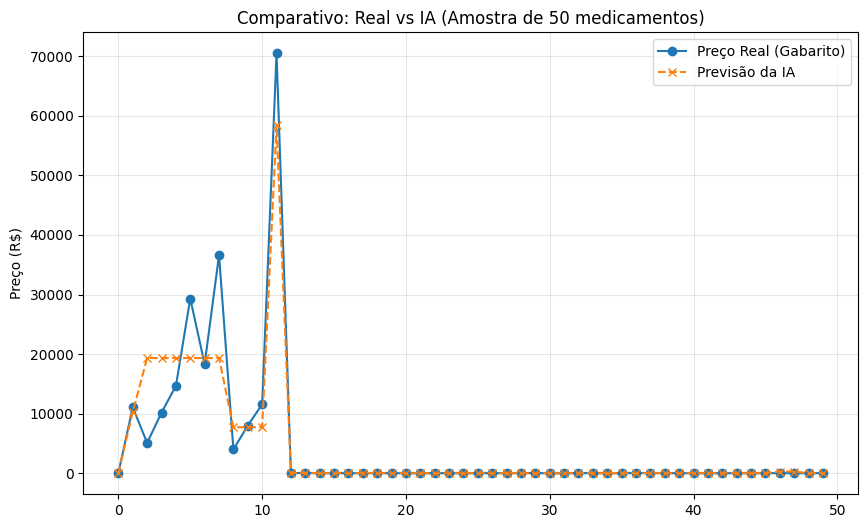

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotando apenas os primeiros 50 para não poluir o gráfico
plt.plot(y_test.values[:50], label='Preço Real (Gabarito)', marker='o')
plt.plot(previsoes_2025[:50], label='Previsão da IA', marker='x', linestyle='--')
plt.title('Comparativo: Real vs IA (Amostra de 50 medicamentos)')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CARREGAR E LIMPAR
df_ml = historico.copy()
df_ml = df_ml.dropna(subset=['preco_final_consumidor'])

# Filtro de Realidade (Focando em produtos de prateleira < R$ 3.000 para estabilizar)
df_ml = df_ml[df_ml['preco_final_consumidor'] < 3000]

# ==============================================================================
# 2. ENGENHARIA DE ATRIBUTOS (O SEGREDO DA MELHORIA)
# ==============================================================================

# A) Extraindo a QUANTIDADE das caixas
# A regex procura pela letra 'X' seguida de números (ex: "X 30" -> pega 30)
def extrair_qtd(texto):
    padrao = r'X\s*(\d+)'
    match = re.search(padrao, str(texto))
    if match:
        return int(match.group(1))
    return 1 # Se não achar assume 1, pode ser melhorado

df_ml['qtd_unidades'] = df_ml['apresentacao'].apply(extrair_qtd)

# B) Target Encoding no PRINCÍPIO ATIVO (A Alma do Remédio)
# Calcula a média de preço de cada substância
media_ativo = df_ml.groupby('ativo')['preco_final_consumidor'].mean()
df_ml['valor_quimico'] = df_ml['ativo'].map(media_ativo)

# C) Target Encoding no LABORATÓRIO (O Peso da Marca)
media_lab = df_ml.groupby('laboratorio')['preco_final_consumidor'].mean()
df_ml['indice_marca'] = df_ml['laboratorio'].map(media_lab)

# D) Simplificando Tipo de Produto (Novo/Genérico/Similar)
df_ml['tipo_code'] = df_ml['tipo_produto'].astype('category').cat.codes


# Removemos colunas de texto puro e ficamos só com os números que criamos
features = ['valor_quimico', 'indice_marca', 'qtd_unidades', 'tipo_code', 'ano']
target = 'preco_final_consumidor'

X = df_ml[features]
y = df_ml[target]

# Log-Transform no Target (Normaliza a curva de preços)
y_log = np.log1p(y)


# Similar ao outro processo
X_train = X[X['ano'] < 2025]
y_train_log = y_log[X['ano'] < 2025]

X_test = X[X['ano'] == 2025]
y_test_real = y[X['ano'] == 2025]


# Ajustes finos no modelo
modelo = RandomForestRegressor(n_estimators=300, max_depth=25, random_state=15, n_jobs=-1)
modelo.fit(X_train, y_train_log)

# Previsão
log_pred = modelo.predict(X_test)
preco_pred = np.expm1(log_pred)


# Resultados e precisão
mae = mean_absolute_error(y_test_real, preco_pred)
r2 = r2_score(y_test_real, preco_pred)

print("\n=== PERFORMANCE AVANÇADA (Com Qtd e Princípio Ativo) ===")
print(f"Erro Médio (MAE): R$ {mae:.2f}")
print(f"Acurácia (R²): {r2:.2%}")

# Análise de Importância (O que o modelo mais valorizou?)
importancia = pd.Series(modelo.feature_importances_, index=features).sort_values(ascending=False)
print("\n🔍 O que define o preço segundo a IA?")
print(importancia.apply(lambda x: f"{x:.1%}"))

⚙️ Extraindo quantidades das caixas...
🤖 Treinando a Super-Árvore...

=== PERFORMANCE AVANÇADA (Com Qtd e Princípio Ativo) ===
💰 Erro Médio (MAE): R$ 64.46
🚀 Acurácia (R²): 77.72%

🔍 O que define o preço segundo a IA?
valor_quimico    65.8%
qtd_unidades     18.4%
indice_marca     10.0%
tipo_code         4.0%
ano               1.7%
dtype: object


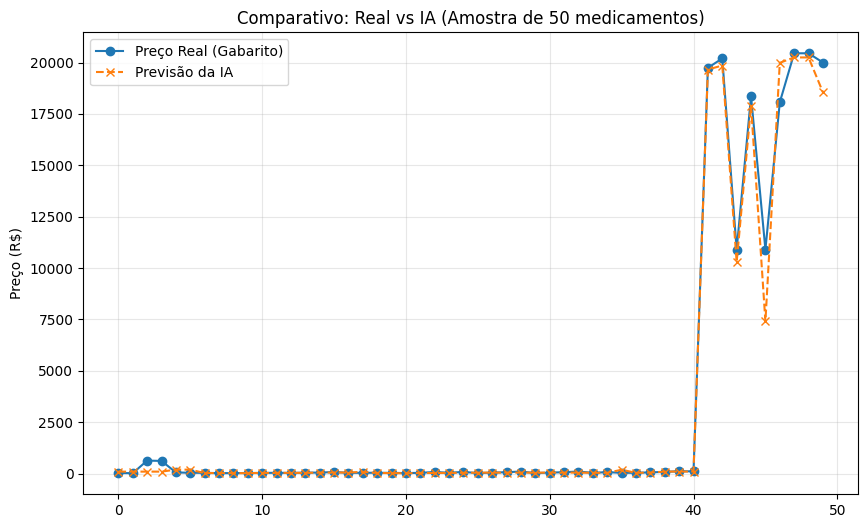

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotando apenas os 50 para não poluir o gráfico
plt.plot(y_test.values[50:100], label='Preço Real (Gabarito)', marker='o')
plt.plot(previsoes_2025[50:100], label='Previsão da IA', marker='x', linestyle='--')
plt.title('Comparativo: Real vs IA (Amostra de 50 medicamentos)')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

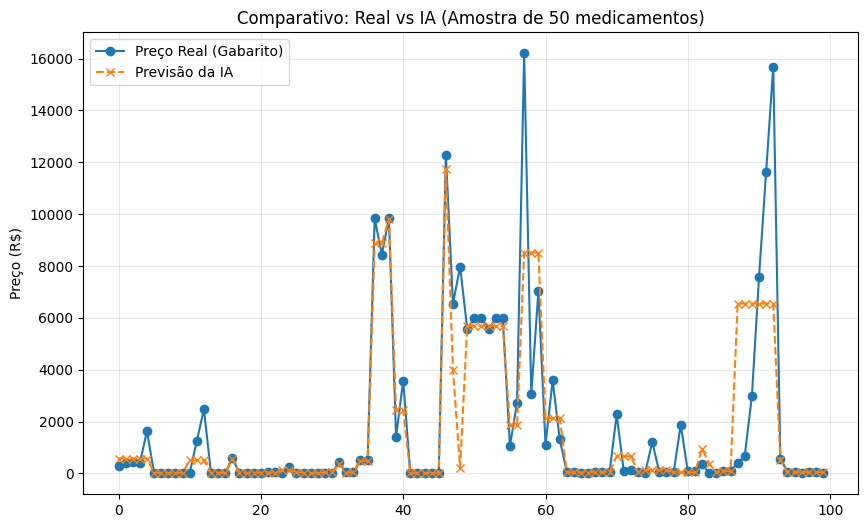

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plotando apenas os 50 para não poluir o gráfico
plt.plot(y_test.values[200:300], label='Preço Real (Gabarito)', marker='o')
plt.plot(previsoes_2025[200:300], label='Previsão da IA', marker='x', linestyle='--')
plt.title('Comparativo: Real vs IA (Amostra de 50 medicamentos)')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()